## Pacakges & Data Cleaning

In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/drive')
cur_path = "/content/drive/MyDrive/DS5460/finalproject"
os.chdir(cur_path)

Mounted at /content/drive


In [3]:
!pip install pyjanitor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.4/158.4 kB 5.5 MB/s eta 0:00:00


In [4]:


# Process
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_categorical_dtype

# sklearn
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler, Normalizer, OneHotEncoder

import janitor

# Visualization
import seaborn as sns; sns.set_style("dark")
%matplotlib inline
import matplotlib.pyplot as plt
import graphviz

In [5]:
df = pd.read_csv("adult.csv").clean_names()
df["marital_relation"] = df["marital_status"] + "_" + df["relationship"]
df = df.drop(["sex","race","education_num", "native_country", "marital_status","relationship"], axis = 1)
df["income"] = df["income"].replace(["<=50K",">50K"], [0,1])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
train, test = train_test_split(df, random_state = 200, train_size = 0.8, stratify = df["income"])

# drop duplicates for income < 50k
train_0 = train[train["income"] == 0]
train_0 = train_0.drop_duplicates()

train_1 = train[train["income"] == 1]
train_new = pd.concat([train_0, train_1], axis = 0)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# trainset
x_train, y_train = train_new.drop("income", axis = 1), train_new["income"]
# testset
x_test, y_test = test.drop("income", axis = 1), test["income"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Exploratory Data Analysis

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


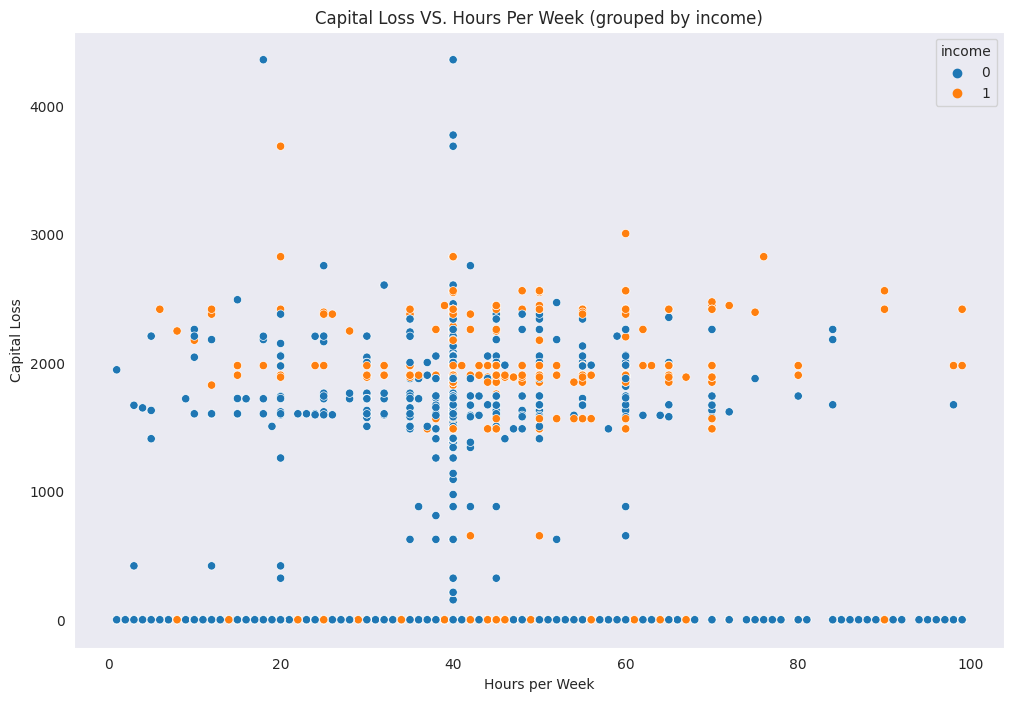

In [8]:
plt.figure(figsize=(12,8))
sns.scatterplot(y = "capital_loss", x = "hours_per_week", data = train, hue = "income")
plt.title("Capital Loss VS. Hours Per Week (grouped by income)")
plt.xlabel("Hours per Week")
plt.ylabel("Capital Loss")
plt.show();

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


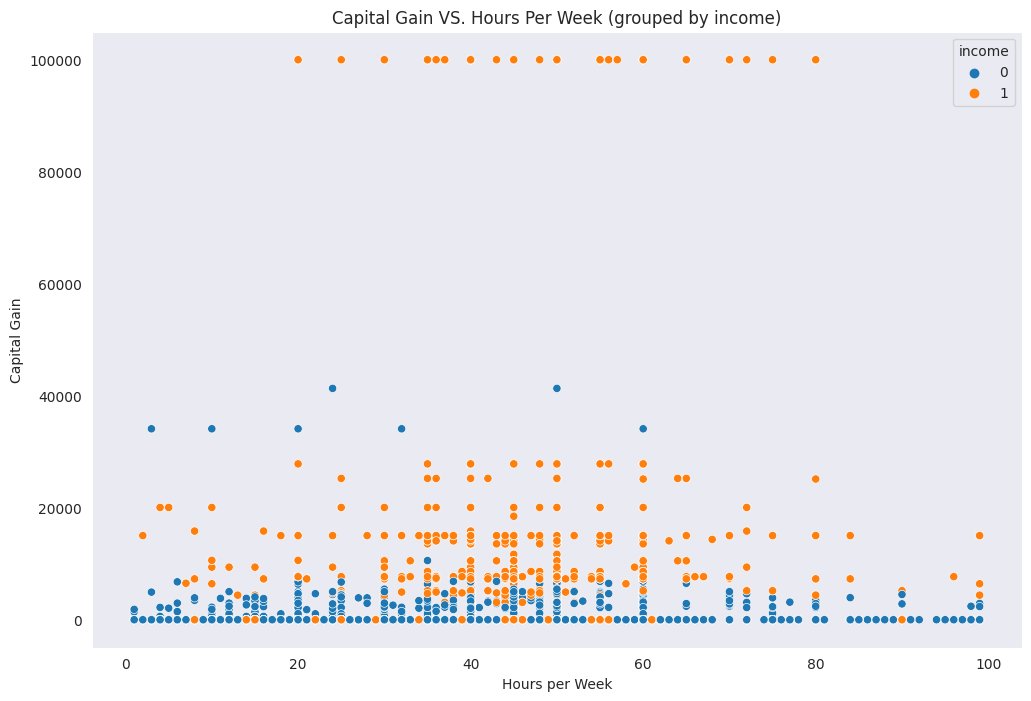

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(y = "capital_gain", x = "hours_per_week", data = train, hue = "income")
plt.title("Capital Gain VS. Hours Per Week (grouped by income)")
plt.xlabel("Hours per Week")
plt.ylabel("Capital Gain")
plt.show();

In [10]:
def cat_chart(df, col):
  col_title = col.title()
  train_new = train.groupby([col, "income"], as_index = False).size()
  plt.figure(figsize=(12,8))
  sns.barplot(x = col, y = "size",data = train_new, hue = "income")
  plt.title("Income Analysis via " + col_title)
  plt.xlabel(col_title)
  plt.ylabel("Frequency")
  plt.xticks(rotation = 90)
  plt.show();

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


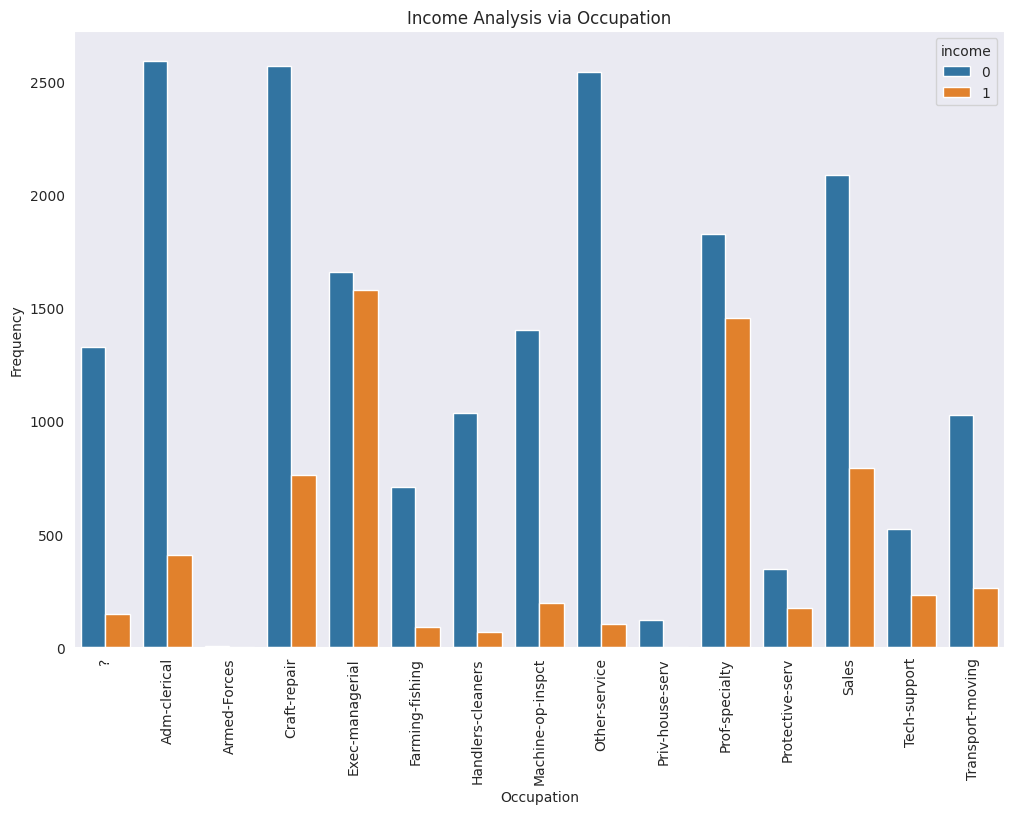

In [11]:
cat_chart(train, "occupation")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


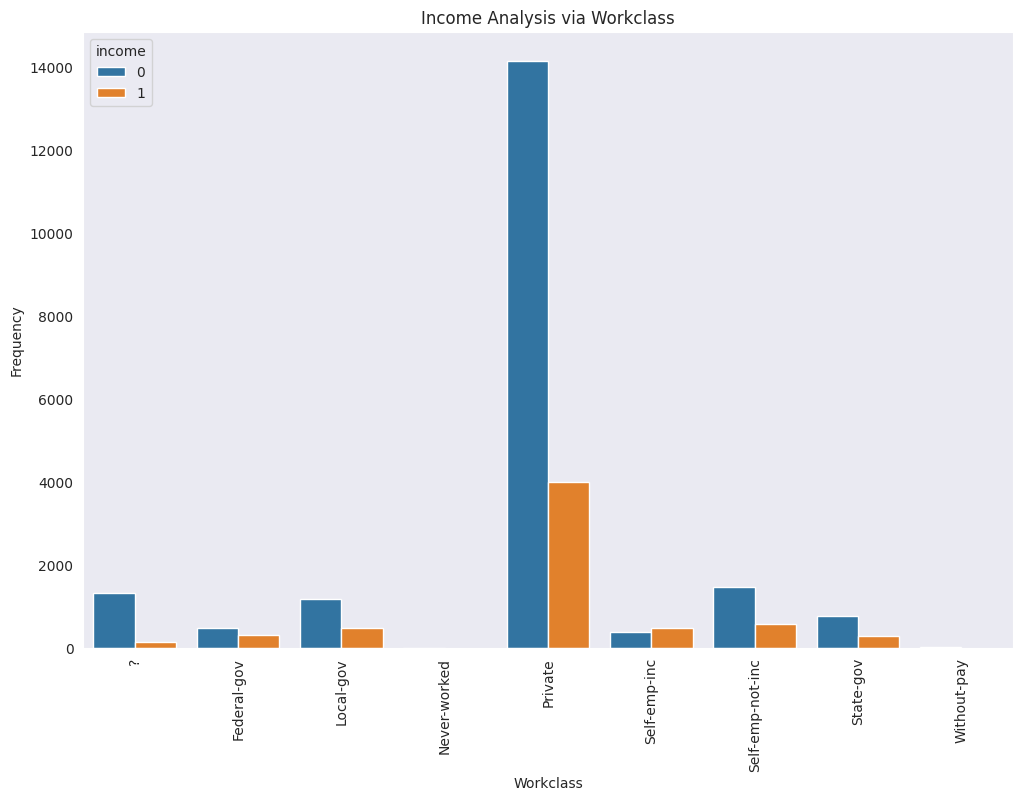

In [12]:
cat_chart(df, "workclass")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


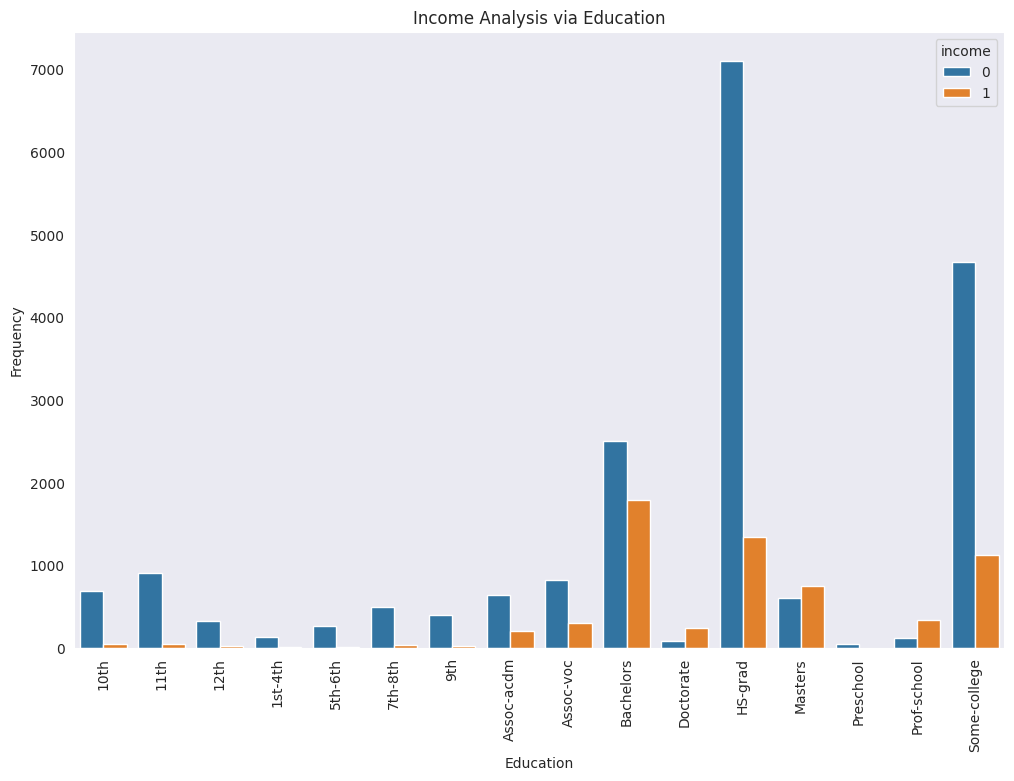

In [13]:
cat_chart(train, "education")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


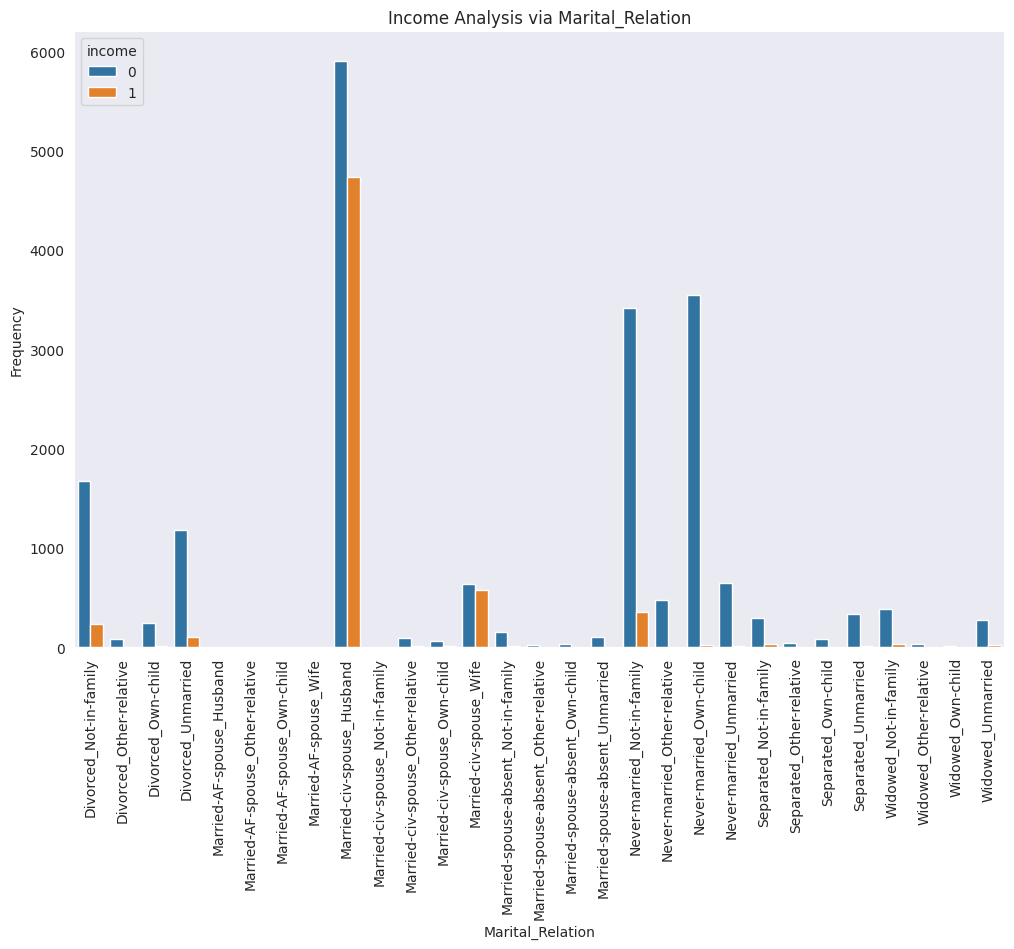

In [14]:
cat_chart(train, "marital_relation")

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


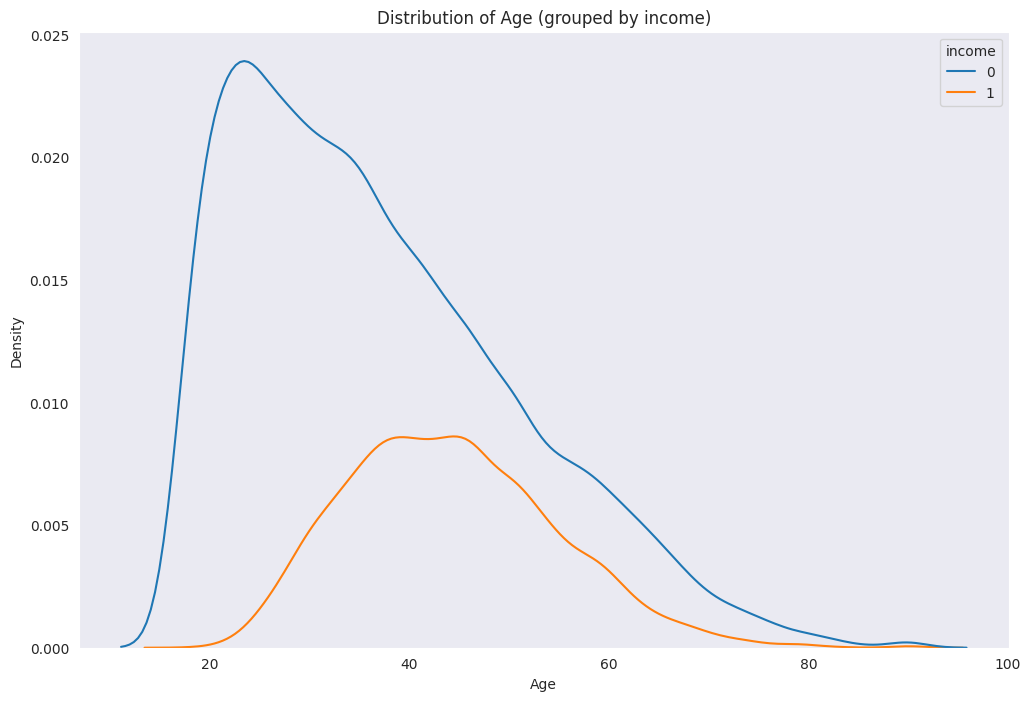

In [15]:
plt.figure(figsize = (12,8))
sns.kdeplot(x = "age", hue = "income", data = train)
plt.title("Distribution of Age (grouped by income)")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show();

## Feature Engineering

In [16]:
num = []
cat = []
stri = []
columns = list(x_train.columns)
for col in columns:
    if is_numeric_dtype(x_train[col]):
        num.append(col)
    elif is_string_dtype(x_train[col]):
        stri.append(col)
    elif is_categorical_dtype(x_train[col]):
        cat.append(col)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
df["education"].unique()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

In [18]:
stri.remove("education")
educ = ["education"]
num, stri, cat, educ

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week'],
 ['workclass', 'occupation', 'marital_relation'],
 [],
 ['education'])

In [19]:
min_max = MinMaxScaler()
ohe = OneHotEncoder()
ordi = OrdinalEncoder(categories = [["Preschool", "1st-4th","5th-6th", "7th-8th", "9th", "10th", 
                                            "11th", "12th", "HS-grad", "Some-college",
                                            "Assoc-voc","Assoc-acdm","Bachelors", "Masters","Prof-school","Doctorate"]])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
def column_transform(df, columns):
    new_df = df.copy()
    for col in columns:
        # num ~ [0,1]
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            new_df[col + "_scaled"] = ct.fit_transform(df)
            continue
        # stri ~ {0,1}    
        elif col in stri:
            elements = sorted(df[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                x = ct2.fit_transform(df).toarray()
            elif len(elements) <= 2:
                x = np.array(ct2.fit_transform(df))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # depends on ord class
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            x = ct3.fit_transform(df)
            new_df[col + "_new"] = x
            continue
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
def column_fit_transform(train, other, columns):
    new_df = other.copy()
    for col in columns:
        # minmax
        if col in num:
            ct = ColumnTransformer([("min_max", min_max, [col])])
            ct.fit(train)
            new_df[col + "_scaled"] = ct.transform(other)
        # ohe
        elif col in stri:
            elements = sorted(other[col].unique())
            ct2 = ColumnTransformer([("ohe", ohe, [col])])
            if len(elements) > 2:
                ct2.fit(train)
                x = ct2.transform(other).toarray()
            elif len(elements) <= 2:
                ct2.fit(train)
                x = np.array(ct2.transform(other))
            for i in range(len(elements)):
                new_df[col + "_" + elements[i].lower()] = x[:,i]
        # ord
        elif col in educ:
            ct3 = ColumnTransformer([("ord", ordi, [col])])
            ct3.fit(train)
            x = ct3.transform(other)
            new_df[col + "_new"] = x
        
    new_df = new_df.drop(columns, axis = 1)
    return new_df

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# train
new_train_data = column_transform(x_train, list(x_train.columns))
# Add label column (income) back to the trainset
#new_train_data["income"] = train_new["income"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
new_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26035 entries, 11761 to 21399
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   age_scaled                                             26035 non-null  float64
 1   workclass_?                                            26035 non-null  float64
 2   workclass_federal-gov                                  26035 non-null  float64
 3   workclass_local-gov                                    26035 non-null  float64
 4   workclass_never-worked                                 26035 non-null  float64
 5   workclass_private                                      26035 non-null  float64
 6   workclass_self-emp-inc                                 26035 non-null  float64
 7   workclass_self-emp-not-inc                             26035 non-null  float64
 8   workclass_state-gov                       

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
new_test_data = column_fit_transform(x_train, x_test, x_train.columns)
test_col, train_col = list(new_test_data.columns), list(new_train_data.columns)
missing = list(set(train_col).difference(set(test_col)))
for miss in missing:
    new_test_data[miss] = 0.0

new_test_data.info()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 24169 to 18117
Data columns (total 59 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   age_scaled                                             6513 non-null   float64
 1   workclass_?                                            6513 non-null   float64
 2   workclass_federal-gov                                  6513 non-null   float64
 3   workclass_local-gov                                    6513 non-null   float64
 4   workclass_never-worked                                 6513 non-null   float64
 5   workclass_private                                      6513 non-null   float64
 6   workclass_self-emp-inc                                 6513 non-null   float64
 7   workclass_self-emp-not-inc                             6513 non-null   float64
 8   workclass_state-gov                        

In [25]:
train = new_train_data
label = train_new["income"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
rf0 = RandomForestClassifier(oob_score=True, random_state=10)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
rf0.fit(train,label)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(oob_score=True, random_state=10)

In [29]:
rf = RandomForestClassifier()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
param_grid = [{"n_estimators":[20,40,60,80,100], "max_depth": list(range(8,20)), "max_features": list(range(8, 20))}]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
rand_search = RandomizedSearchCV(rf, param_grid, cv = 5, n_iter = 20)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
rand_search.fit(new_train_data, train_new["income"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions=[{'max_depth': [8, 9, 10, 11, 12, 13, 14,
                                                       15, 16, 17, 18, 19],
                                         'max_features': [8, 9, 10, 11, 12, 13,
                                                          14, 15, 16, 17, 18,
                                                          19],
                                         'n_estimators': [20, 40, 60, 80,
                                                          100]}])

In [39]:
pd.DataFrame(rand_search.cv_results_).sort_values("rank_test_score", ascending = True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.584118,0.302879,0.053783,0.003924,60,16,14,"{'n_estimators': 60, 'max_features': 16, 'max_...",0.859228,0.861533,0.865950,0.870175,0.861148,0.863607,0.003953,1
2,0.794111,0.016440,0.040796,0.002179,40,11,18,"{'n_estimators': 40, 'max_features': 11, 'max_...",0.859804,0.860380,0.869599,0.866718,0.860764,0.863453,0.003960,2
18,1.820942,0.333275,0.099429,0.009264,100,8,17,"{'n_estimators': 100, 'max_features': 8, 'max_...",0.858076,0.861533,0.866334,0.871327,0.857307,0.862915,0.005277,3
14,1.456052,0.072793,0.061616,0.004967,60,15,17,"{'n_estimators': 60, 'max_features': 15, 'max_...",0.856539,0.858268,0.870175,0.868830,0.859996,0.862762,0.005628,4
15,1.807015,0.667000,0.069852,0.005624,80,11,14,"{'n_estimators': 80, 'max_features': 11, 'max_...",0.855195,0.864029,0.862877,0.872095,0.859228,0.862685,0.005629,5
10,0.437080,0.022436,0.019237,0.000752,20,15,12,"{'n_estimators': 20, 'max_features': 15, 'max_...",0.855579,0.862877,0.862301,0.870367,0.858652,0.861955,0.004966,6
13,0.634386,0.050401,0.033704,0.002036,40,10,13,"{'n_estimators': 40, 'max_features': 10, 'max_...",0.854235,0.861725,0.863453,0.870751,0.859612,0.861955,0.005381,6
6,1.638424,0.021035,0.080484,0.009520,100,12,12,"{'n_estimators': 100, 'max_features': 12, 'max...",0.852890,0.861725,0.864797,0.869599,0.856731,0.861148,0.005878,8
0,2.073143,0.856869,0.060922,0.036786,40,18,18,"{'n_estimators': 40, 'max_features': 18, 'max_...",0.856731,0.858460,0.864797,0.867678,0.857115,0.860956,0.004445,9
17,1.227952,0.016313,0.056378,0.001288,80,12,11,"{'n_estimators': 80, 'max_features': 12, 'max_...",0.852890,0.862301,0.863069,0.869791,0.856347,0.860880,0.005841,10


In [40]:
rand_search.best_estimator_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(max_depth=14, max_features=16, n_estimators=60)

In [41]:
model = rand_search.best_estimator_

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
model.fit(new_train_data, train_new["income"])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RandomForestClassifier(max_depth=14, max_features=16, n_estimators=60)

In [43]:
#new_test_data = column_fit_transform(x_train, x_test, x_train.columns)
test_col, train_col = list(new_test_data.columns), list(new_train_data.columns)
missing = list(set(train_col).difference(set(test_col)))
missing

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[]

In [44]:
len(new_train_data.columns), len(new_test_data.columns)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(59, 59)

In [45]:
new_test_data = new_test_data[list(new_train_data.columns)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
preds = model.predict(new_test_data)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
new_test_data = new_test_data.drop("pred_proba", axis = 1)
new_test1 = new_test_data.copy()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
new_test1["pred_proba"] = model.predict_proba(new_test_data)[:,1]
new_test1 = new_test1.reset_index(drop = True)
for i in range(len(new_test1)):
  if new_test1.loc[i, "pred_proba"] >= 0.5:
    new_test1.loc[i, "pred"] = 1
  else: 
    new_test1.loc[i, "pred"] = 0

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
new_test1

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_scaled,workclass_?,workclass_federal-gov,workclass_local-gov,workclass_never-worked,workclass_private,workclass_self-emp-inc,workclass_self-emp-not-inc,workclass_state-gov,workclass_without-pay,...,marital_relation_separated_not-in-family,marital_relation_separated_other-relative,marital_relation_separated_own-child,marital_relation_separated_unmarried,marital_relation_widowed_not-in-family,marital_relation_widowed_other-relative,marital_relation_widowed_own-child,marital_relation_widowed_unmarried,pred_proba,pred
0,0.205479,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009105,0.0
1,0.383562,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.049966,0.0
2,0.136986,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003617,0.0
3,0.630137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.567881,1.0
4,0.315068,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009811,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0.356164,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.884408,1.0
6509,0.356164,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035994,0.0
6510,0.301370,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.198040,0.0
6511,0.027397,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000243,0.0


In [60]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
def tree_predict(rf, new_test_data, prop):
  new_test1 = new_test_data.copy()
  new_test1["pred_proba"] = rf.predict_proba(new_test_data)[:,1]
  new_test1["pred_proba"] = model.predict_proba(new_test_data)[:,1]
  new_test1 = new_test1.reset_index(drop = True)
  for i in range(len(new_test1)):
    if new_test1.loc[i, "pred_proba"] >= prop:
      new_test1.loc[i, "pred"] = 1
    else: 
      new_test1.loc[i, "pred"] = 0
      
  return new_test1["pred"]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
### Trying out different probability tresholds to evaluate their accuracies/metrics
def tree_pred_threshold(prop):
  incomes = []
  preds = tree_predict(model, new_test_data, prop)

  precision = precision_score(y_test, preds)
  recall = recall_score(y_test, preds)
  accuracy = accuracy_score(y_test, preds)
  
  return precision, recall, accuracy

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
precisions = []
recalls = []
accuracy = []
prop = list(np.linspace(0,1, 100))[1:-1]
for i in range(len(prop)):
  res = tree_pred_threshold(prop[i])
  precisions.append(res[0])
  recalls.append(res[1])
  accuracy.append(res[2])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
prop[np.argmax(accuracy)], accuracy[np.argmax(accuracy)]

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.27272727272727276, 0.8265008444649163)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


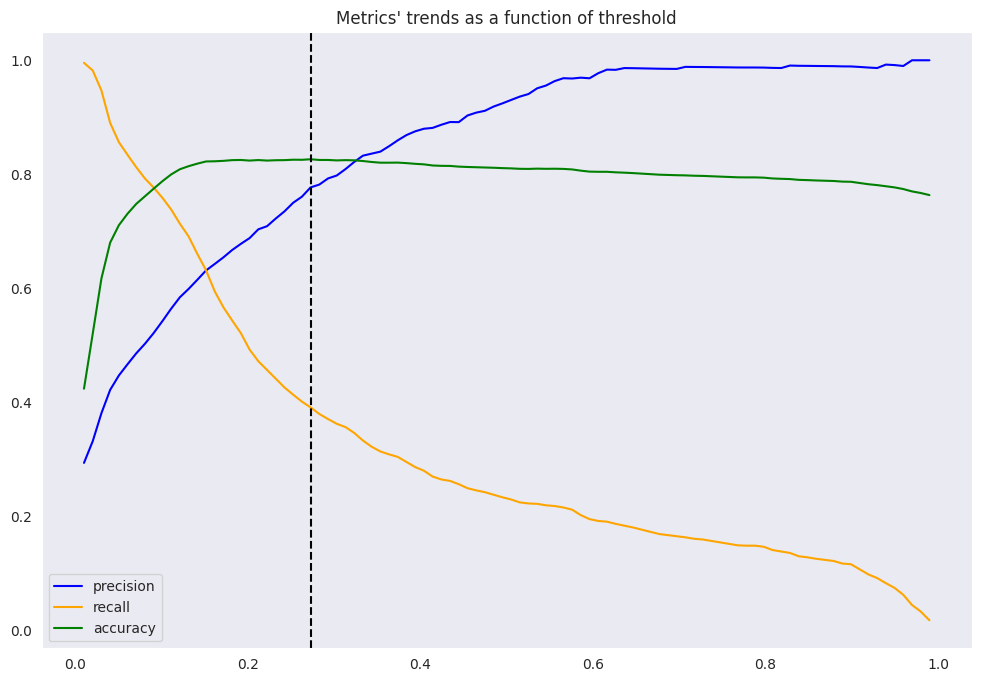

In [70]:
plt.figure(figsize = (12,8))
sns.lineplot(x = prop, y = precisions, color = "blue", label = "precision")
sns.lineplot(x = prop, y = recalls, color = "orange", label = "recall")
sns.lineplot(x = prop, y = accuracy, color = "green", label = "accuracy")
plt.axvline(x = prop[np.argmax(accuracy)], color = "black", linestyle = "dashed")
plt.title("Metrics' trends as a function of threshold")
plt.show();

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
preds = tree_predict(model, new_test_data, 0.272)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
preds

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.7726130653266332, 0.39221938775510207, 0.8258866881621373)

In [76]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4945
           1       0.77      0.39      0.52      1568

    accuracy                           0.83      6513
   macro avg       0.80      0.68      0.71      6513
weighted avg       0.82      0.83      0.80      6513



/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

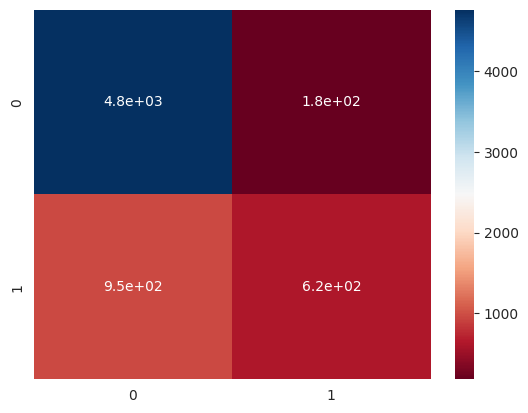

In [77]:
conf = confusion_matrix(y_test, preds)
sns.heatmap(conf, annot = True, cmap = "RdBu")